<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Richardson_08_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

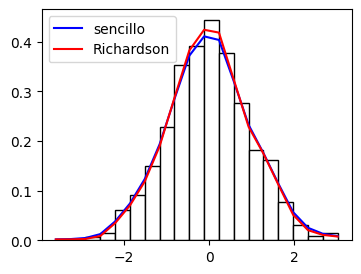

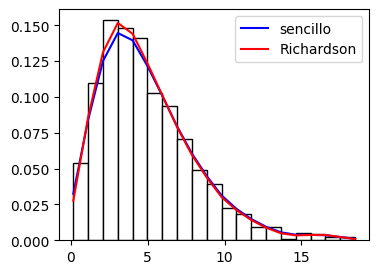

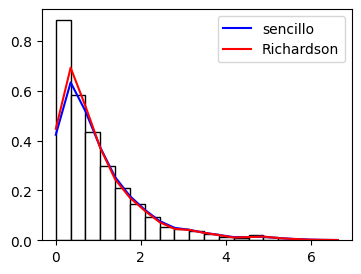

In [ ]:
from scipy.stats import gaussian_kde,kstest,chi2,norm,expon
import numpy as np
from random import gauss,seed,random
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from math import sqrt,log,exp,pi
from time import time
from numba import jit
from random import random
@jit(nopython=True)
def K(x):
  return (1/sqrt(2*pi))*exp(-(x**2)/2)
@jit(nopython=True)
def pdf(z,h,l):
  m=len(l)
  suma=0
  for i in range(m):
    suma=suma+K((z-l[i])/h)
  return suma/(m*h)
def serie_0(n):
  return norm.rvs(0,1,n)
def serie_1(n):
  return chi2.rvs(5,0,1,n)
def serie_2(n):
  return expon.rvs(0,1,n)
n=1000
for serie in [serie_0,serie_1,serie_2]:
  l=serie(n)
  o=np.std(l)
  h=1.05*o/(n**0.2)
  m=min(l)
  M=max(l)
  b=[]
  x=m
  while x<M:
    b.append(x)
    x=x+(M-m)/20
  le=[]
  le1=[]
  for z in b:
    p1=pdf(z,h,l)
    h1=2*h
    p2=pdf(z,h1,l)
    le.append(p1)
    le1.append((4*p1-p2)/3)
  plt.figure(figsize=(4,3))
  plt.hist(l,density=1,bins=b,color='white',edgecolor='black')
  plt.plot(b,le,color='blue',label='sencillo')
  plt.plot(b,le1,color='red',label='Richardson')
  plt.legend()
  plt.show()

**Actividad**

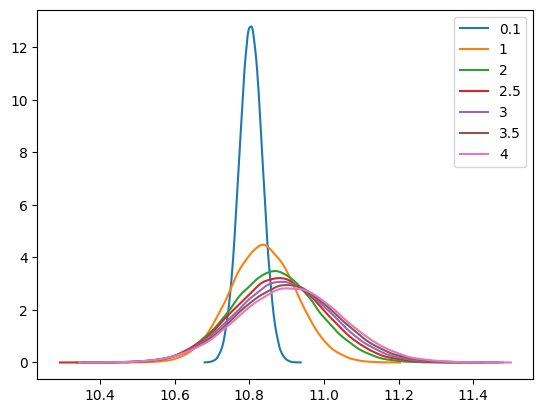

14.364203138627868


In [1]:
#cox Ingersoll Ross
from scipy.stats import gaussian_kde,kstest
from scipy.optimize import minimize
import numpy as np
from random import gauss,seed
import matplotlib.pyplot as plt
from math import sqrt,log,exp,pi
from random import random
from time import time
from numba import jit

@jit(nopython=True)
def F(z,u,o,c):
  return c*(z-u)
@jit(nopython=True)
def G(z,u,o,c):
  return o*sqrt(z)
@jit(nopython=True)
def Gp(z,u,o,c):
  return o/(2*sqrt(z))
@jit(nopython=True)
def K(x):
  return (1/sqrt(2*pi))*exp(-(x**2)/2)
@jit(nopython=True)
def pdf(z,h,l):
  m=len(l)
  suma=0
  for i in range(m):
    suma=suma+K((z-l[i])/h)
  return suma/(m*h)

@jit(nopython=True)
def f(z0,x,delta,ns,T):
  seed(178341)
  oo=sqrt(delta)
  u=x[0]
  o=x[1]
  c=x[2]
  l=np.zeros(ns)
  for j in range(ns):
    z=z0
    t=0
    while t<T:
      w=oo*gauss(0,1)
      z=z+F(z,u,o,c)*delta+G(z,u,o,c)*w+(1/2)*G(z,u,o,c)*Gp(z,u,o,c)*(w**2-delta)
      t=t+delta
    l[j]=z
  l=np.sort(l)
  o1=np.std(l)
  h=1.06*o1/(ns**0.2)
  ll=[]
  for x in l:
    ll.append(pdf(x,h,l))
  return l,ll

t1=time()

u0=11
o0=0.03
c0=-0.2
delta=0.001
z0=10.8
ns=100000
x=np.array([u0,o0,c0])
for T in [0.1,1,2,2.5,3,3.5,4]:
  l,ll=f(z0,x,delta,ns,T)
  plt.plot(l,ll,label=str(T))
plt.legend()
plt.show()

t2=time()
print((t2-t1)/69)
